# **The Sparks Foundation**

# **Data Science and Business Analytics Internship**

# **Task #1: Prediction using Supervised Machine Learning**

# **Coder: Satyam Raj**

Importing required libraries 

In [87]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from CSV file

In [88]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Printing the first 5 records

In [89]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Printing the last 5 records

In [90]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#By using describe() method we can see percentiles,mean,std,max,count of the dataset

In [91]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


here we can see full summary of the dataframe 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## **Plotting boxplot of the given data**

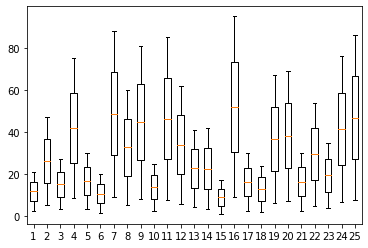

In [93]:
plt.boxplot(data)
plt.show()

## **Plotting Scatter plot**

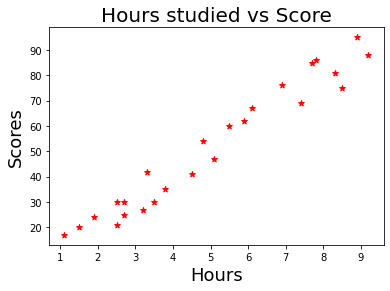

In [94]:
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Scores',fontsize=18)
plt.title('Hours studied vs Score', fontsize=20)
plt.scatter(data.Hours,data.Scores,color='red',marker='*')
plt.show()

##  **"Scatter plot" shows positive linear relationship as much as hours you study is a chance of high scoring.**

# **Predicting the data**

In [99]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [103]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## **Splitting the data into train and test sets.**

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [105]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


## **Training the model**

In [106]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [107]:
linreg.fit(X_train,Y_train)
print("Training algorithm is finished")

Training algorithm is finished


In [108]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = 2.018160041434662 
B1 = [9.91065648]


## **Plotting the regression line.**

In [109]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

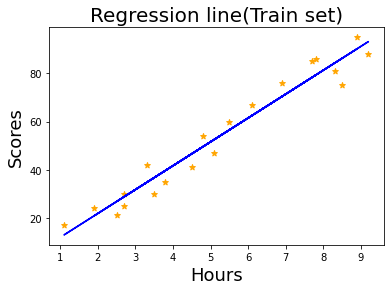

In [110]:
plt.scatter(X_train,Y_train,color='orange',marker='*')
plt.plot(X_train,Y0,color='blue')
plt.xlabel("Hours",fontsize=18)
plt.ylabel("Scores",fontsize=18)
plt.title("Regression line(Train set)",fontsize=20)
plt.show()

## **Testing the data**

In [111]:
Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [112]:
Y_test

array([20, 27, 69, 30, 62])

## **Plotting line on test data**

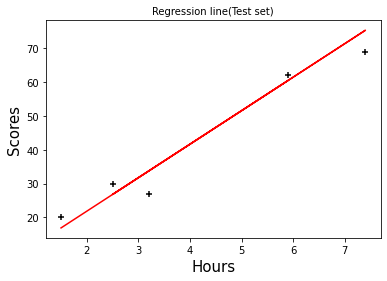

In [113]:
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

# **Comparing actual scores and predicted scores**

In [114]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Accuracy of the model.**

In [115]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105354

Above 94% percent demonstrates that above fitted model is a good model.

# **Predicting Error**

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [117]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.598769307217456
Root Mean Squared Error =  4.647447612100373
Mean Absolute Error     =  4.647447612100373


# **Predicting score**

In [118]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


# **Conclusion:**

# **From the result we can say that if a student studied for 9.25 hours per day then the student will secured 93.69 marks.**